In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
imgs_array = np.load('imgs_array.npy')
y = np.load('y.npy')
names = np.load('names.npy')

In [5]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test, names_train, names_test = train_test_split(imgs_array, y, names, test_size=0.2, random_state=42)

In [24]:
from sklearn.metrics.pairwise import euclidean_distances

def image_retrieval_k(train_data, test_data, train_names, test_names, k=20, hide=0):
    avg_precisions = []
    avg_recalls = []
    all_avg_precisions = []
    all_avg_recalls = []
    
    for idx, query in enumerate(test_data):
        
        all_precisions = []
        all_recalls = []
        precisions = []
        recalls = []
        

        query = query.reshape((1, -1))
        D = euclidean_distances(train_data, query).squeeze()
        index = np.argsort(D)
                
        for kk in range(1, k+1):
            TP = 0
            FP = 0
            FN = 0
            
            correct_count = 0
            for ind in index:
                if train_names[ind] == test_names[idx]:
                    correct_count += 1
            sized_index = index[:kk]
            
            tmp = [query.reshape((32,32))]
            for ind in sized_index:
                tmp.append(train_data[ind].reshape((32,32)))
                if train_names[ind] == test_names[idx]:
                    TP += 1
                else:
                    FP += 1
            FN = correct_count - TP

            output = np.array(tmp)*255
            output = output.transpose(1, 0, 2)
            output = output.reshape((32, -1))
            im_query = Image.fromarray(output)
            
            # If the last k image is a correct image we add precision to the list
            if train_names[sized_index[-1]] == test_names[idx]:
                precisions.append(TP/(TP+FP))
                recalls.append(TP/(TP+FN))

            # Adding all precisions and recalls to a seperate list
            all_precisions.append(TP/(TP+FP))
            all_recalls.append(TP/(TP+FN))
        
            if hide == 0:
                if train_names[sized_index[-1]] == test_names[idx]:
                    print("\nCorrect Image of ", train_names[sized_index[-1]])
                print("TP: {} \tFP: {} \tFN: {}".format(TP,FP,FN))
                print("Precision: {} \t Recall: {}".format(all_precisions[-1], all_recalls[-1]))
                display(im_query) 
        
        # If no correct images found we append a precision of 0 for AP of 0
        if precisions == []:
            precisions.append(0)
            recalls.append(0)
            
        avg_precisions.append(np.average(precisions))
        avg_recalls.append(np.average(recalls))
        
        if hide == 0:
            print("\nAverage Precision for query {}: ".format(idx), avg_precisions[-1])
        
        all_avg_precisions.append(np.average(all_precisions))
        all_avg_recalls.append(np.average(all_recalls))
        
    return avg_precisions, avg_recalls, all_avg_precisions, all_avg_recalls

In [25]:
mAP_list = []
for k in range(1,21):
    avg_precisions, avg_recalls, all_avg_precisions, all_avg_recalls = image_retrieval_k(X_train, X_test, names_train, names_test, k, 1)
    mAP_list.append(np.average(avg_precisions))
    print("K = {} mAP = {}".format(k, mAP_list[-1]))
    
mAP = np.average(mAP_list)
print("overall mAP: ", mAP)

K = 1 mAP = 0.8825622775800712
K = 2 mAP = 0.891459074733096
K = 3 mAP = 0.8873072360616845
K = 4 mAP = 0.8838473705021747
K = 5 mAP = 0.8809311981020166
K = 6 mAP = 0.8779458283906683
K = 7 mAP = 0.8750040953510704
K = 8 mAP = 0.8707920772104809
K = 9 mAP = 0.8655307464029504
K = 10 mAP = 0.8613757947491637
K = 11 mAP = 0.857659624953304
K = 12 mAP = 0.8538426540042406
K = 13 mAP = 0.8506028458601885
K = 14 mAP = 0.8477988132901724
K = 15 mAP = 0.8422078900604327
K = 16 mAP = 0.8389375063002392
K = 17 mAP = 0.8366529426402184
K = 18 mAP = 0.8343007508920747
K = 19 mAP = 0.8309454115702722
K = 20 mAP = 0.8289212200558969
overall mAP:  0.8599312679355208


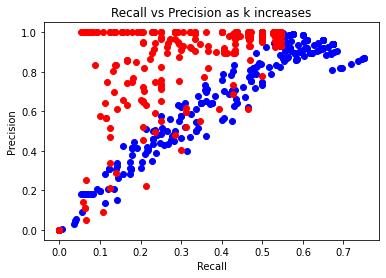

In [26]:
plt.scatter(all_avg_recalls, all_avg_precisions, color='blue')
plt.scatter(avg_recalls, avg_precisions, color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Recall vs Precision as k increases')
plt.show()

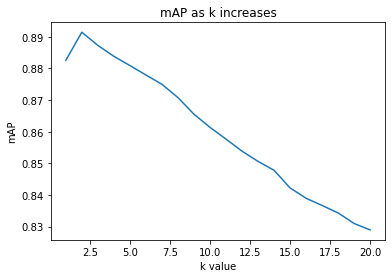

In [44]:
plt.plot(np.linspace(1,20,20), mAP_list)
plt.xlabel('k value')
plt.ylabel('mAP')
plt.title('mAP as k increases')
plt.show()